# Критерий согласия Колмогорова, критерий однородности Смирнова

Критерий согласия Колмогорова предназначен для проверки гипотезы о принадлежности выборки некоторому закону распределения, то есть проверки того, что эмпирическое распределение соответствует предполагаемой модели.

Критерий однородности Смирнова используется для проверки гипотезы о принадлежности двух независимых выборок одному закону распределения, то есть о том, что два эмпирических распределения соответствуют одному и тому же закону.
Неформальная рекомендация к использованию критерия Колмогорова-Смирнова n > 60

Зададим равномерное эмпирическое распределение и с помощью теста Колмогорова-Смирнова вычислим p-value для двух целевых распределений: равномерного, нормального

In [10]:
import math
from scipy import stats
import numpy as np
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 10, 6
PATH = "/Users/daria/stepikcourse/"

In [2]:
# зададим массив равномерных распределний размером от 5 до 50 с шагом 2
unif_dist = [stats.uniform.rvs(loc=0, scale=1, size=i, random_state=True) for i in np.arange(5, 100, 3)]

In [4]:
# функция вычисления K критерия, а также соответствующих ему уровней p-value теста Колмогорова-Смирнова и Шапиро-Уилка

def valuestest(dist, test, cdf='norm'): # test = 1 - Shapiro, 0 - Kolmogorov
    K = []
    p_pvalue = []
    samp_len = []
    
    if test == 0:     
        for i in range(0, len(dist)):
            stat, p = stats.kstest(dist[i], cdf)
            K.append(stats.kstest(dist[i], cdf)[0])
            p_pvalue.append(stats.kstest(dist[i], cdf)[1])
            samp_len.append(len(dist[i]))
            
    elif test == 1:
        for i in range(0, len(dist)):
            stat, p = stats.shapiro(dist[i])
            K.append(stats.shapiro(dist[i])[0])
            p_pvalue.append(stats.shapiro(dist[i])[1])
            samp_len.append(len(dist[i]))
        
    return K, p_pvalue, samp_len

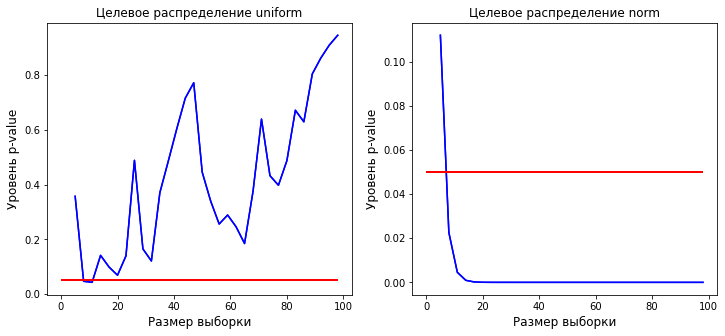

In [11]:
n = ['uniform', 'norm']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

for x, i in enumerate(n):
    ax[x].plot(valuestest(unif_dist, 0, i)[2], valuestest(unif_dist, 0, i)[1], color='blue')
    ax[x].plot(valuestest(unif_dist, 0, i)[2], valuestest(unif_dist, 0, i)[1], color='blue')
    ax[x].hlines(0.05, 0, max(valuestest(unif_dist, 0, i)[2]), color='r', lw=2)
    ax[x].set_title(f'Целевое распределение {i}', fontsize=12)
    ax[x].set_xlabel('Размер выборки', fontsize=12)
    ax[x].set_ylabel('Уровень p-value', fontsize=12)


Левый график показывает, что величина pvalue при применение теста Колмогорова-Смирнова для определения принадлежности эмпирического равномерного распределения целевому равномерному распределнию растет с увеличением выборки, для выборок >15 тест не опускается ниже уровня значимости равным 0,05.

На правом графике (эмпирическое распределение - равномерное, целевое - нормальное) также видно, что при выборке >15 величина pvalue значительно ниже заданного уровня значимости

Применим тест Смирнова для проверки гипотезы о принадлежности двух независимых выборок одному распределению

In [7]:
unif_sampl1 = [stats.norm.rvs(loc=3, scale=1, size=i) for i in np.arange(3, 100, 2)]
unif_sampl2 = [stats.norm.rvs(loc=3, scale=1, size=i) for i in np.arange(3, 100, 2)]

In [8]:
stat_list = []
p_list = []
len_list = []
for i in range(0, len(unif_sampl1)):
    
    stat, p = stats.kstest(unif_sampl1[i], unif_sampl2[i])
    stat_list.append(stats.kstest(unif_sampl1[i], unif_sampl2[i])[0])
    p_list.append(stats.kstest(unif_sampl1[i], unif_sampl2[i])[1])
    len_list.append(len(unif_sampl1[i]))

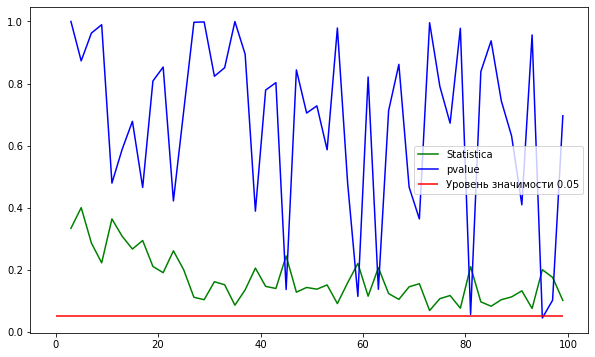

In [12]:
plt.plot(len_list, stat_list, color='green', label = 'Statistica')
plt.plot(len_list, p_list, color='blue', label = 'pvalue')
plt.hlines(0.05, 0, max(len_list), color = 'red', label = 'Уровень значимости 0.05')
plt.legend()

Из приведенного выше графика можно сделать вывод, что мощность теста Смирнова для двух независимых выборок в целом не зависит от размера семпла